In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Stage of behavior prediction

In [2]:
data = pd.read_pickle('data/fitbit_ttm_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,True,False,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stage
0,621e2e8e67b776a24055b564,34.137687,57.4320,33.038,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,46.33698,6517.5,71.701565,149.0,24.0,33.0,713.0,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,Maintenance
1,621e2e8e67b776a24055b564,33.794544,57.6810,33.038,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,46.33698,7178.6,70.579300,132.0,25.0,31.0,704.0,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,Maintenance
2,621e2e8e67b776a24055b564,34.611011,57.4810,33.038,14.6,84.0,0.966667,0.725,0.866667,-2.385801,2262.30,46.33698,6090.9,71.842573,112.0,27.0,31.0,710.0,62.263999,33600000.0,0.0,493.0,67.0,0.0,96.0,1.116883,0.858974,1.015038,1.670732,8253.0,85.0,1350.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,Maintenance
3,621e2e8e67b776a24055b564,34.408304,57.4930,33.038,14.8,82.0,0.933333,0.725,0.833333,-2.124199,2325.10,46.33698,6653.1,71.725477,133.0,21.0,37.0,622.0,62.368900,37620000.0,0.0,540.0,87.0,0.0,93.0,1.128205,1.129870,1.191729,1.588235,9015.0,90.0,1282.0,0.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,Maintenance
4,621e2e8e67b776a24055b564,34.178922,56.7500,33.038,15.2,81.0,0.866667,0.725,0.866667,-2.396873,2586.76,46.33698,9557.9,74.401028,136.0,42.0,54.0,647.0,61.965409,33660000.0,0.0,493.0,68.0,0.0,94.0,0.910256,0.871795,1.211896,1.090909,12949.0,146.0,1274.0,4.0,0.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.866025,-0.433884,0.309017,-0.571268,0.5,-0.900969,0.951057,0.820763,Maintenance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,1596.35,48.76235,5522.1,67.283493,122.0,4.0,32.0,800.0,56.371137,28920000.0,0.0,403.0,79.0,0.0,92.0,0.712644,1.067568,1.090196,0.684783,7231.0,41.0,1393.0,3.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866025,0.433884,0.587785,0.485302,0.5,-0.900969,0.809017,-0.874347,Maintenance
3643,621e339967b776a240e502de,34.460723,51.3510,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,1330.51,48.78266,660.4,79.543436,86.0,0.0,0.0,752.0,56.107319,36120000.0,0.0,497.0,54.0,0.0,91.0,0.732558,1.418919,1.285156,1.153846,1027.0,4.0,1386.0,0.0,0.0,0.0,1.0,1,0.0,1.0,0.0,0.

In [3]:
data = data.drop(columns=['age', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

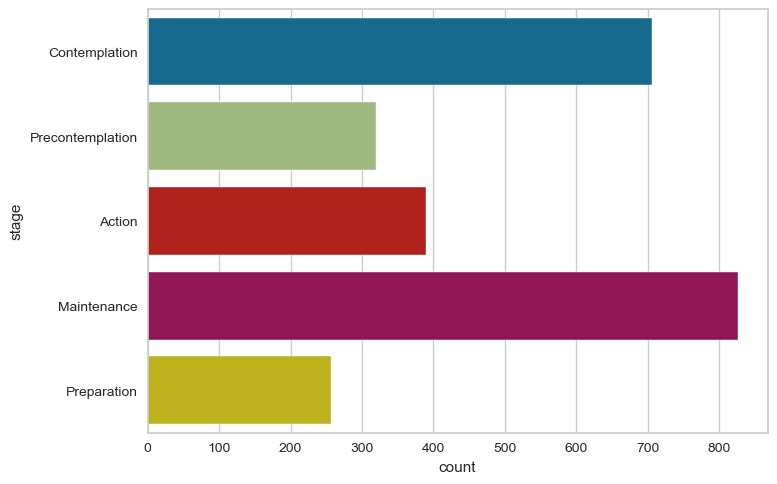

In [4]:
sns.countplot(y="stage", data=train_data)

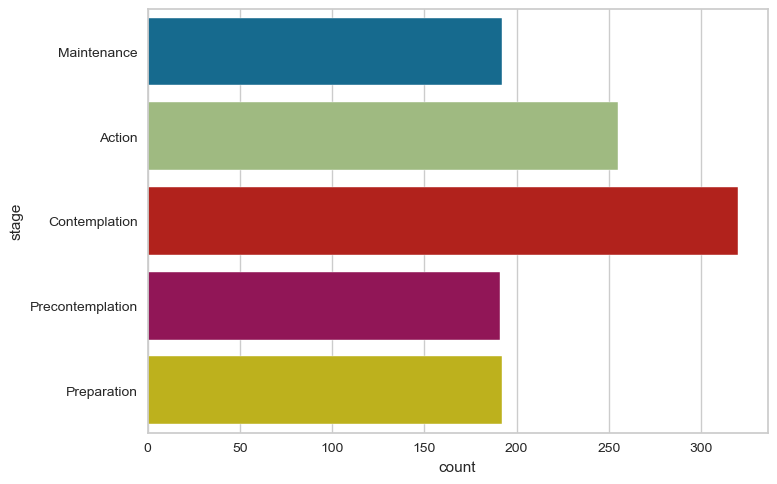

In [5]:
sns.countplot(y="stage", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
target_train = train_data['stage']
train_data.drop(columns=['stage'], inplace=True)
target_test = test_data['stage']
test_data.drop(columns=['stage'], inplace=True)
saved_cols = train_data.columns

In [8]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['stage'] = target_train
test_data['stage'] = target_test

In [9]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=2,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,stage
2,Target Type,Multiclass
3,Label Encoded,"Action: 0, Contemplation: 1, Maintenance: 2, Precontemplation: 3, Preparation: 4"
4,Original Data,"(2497, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.3186,0.0000,0.2346,0.3024,0.2914,0.0849,0.0897,0.0950
lr,Logistic Regression,0.3121,0.0000,0.2382,0.2975,0.2906,0.0950,0.1004,2.7700
lightgbm,Light Gradient Boosting Machine,0.3102,0.0000,0.2379,0.2797,0.2844,0.0735,0.0760,3.1850
qda,Quadratic Discriminant Analysis,0.3054,0.0000,0.2160,0.2214,0.2392,0.0341,0.0422,0.0700
knn,K Neighbors Classifier,0.3047,0.0000,0.2280,0.2824,0.2773,0.0601,0.0638,1.5150
gbc,Gradient Boosting Classifier,0.2911,0.0000,0.2161,0.2757,0.2800,0.0585,0.0603,8.0000
ridge,Ridge Classifier,0.2710,0.0000,0.2029,0.2729,0.2600,0.0424,0.0447,0.0550
dt,Decision Tree Classifier,0.2482,0.0000,0.1777,0.2385,0.2375,-0.0108,-0.0110,1.5400
et,Extra Trees Classifier,0.2398,0.0000,0.1985,0.2269,0.2204,-0.0122,-0.0136,0.5700
lda,Linear Discriminant Analysis,0.2395,0.0000,0.1853,0.2382,0.2315,0.0069,0.0073,0.1550


In [11]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

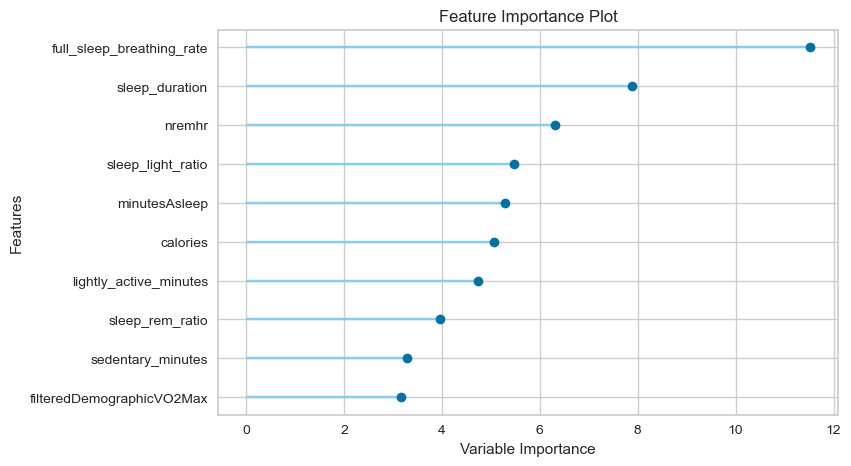

In [12]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [13]:
data = pd.read_pickle('data/fitbit_breq_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,breq_self_determination
0,621e2e8e67b776a24055b564,34.137687,57.432,33.094,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,0.0,-0.866025,0.000000,0.309017,-0.988468,0.5,1.000000,0.951057,0.151428,intrinsic_regulation
1,621e2e8e67b776a24055b564,33.794544,57.681,33.094,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,0.0,-0.866025,0.781831,0.309017,-0.937752,0.5,0.623490,0.951057,0.347305,intrinsic_regulation
2,621e2e8e67b776a24055b564,34.611011,57.481,33.094,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,0.0,-0.866025,0.974928,0.309017,-0.848644,0.5,-0.222521,0.951057,0.528964,intrinsic_regulation
3,621e2e8e67b776a24055b564,34.408304,57.493,33.094,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,0.0,-0.866025,0.433884,0.309017,-0.724793,0.5,-0.900969,0.951057,0.688967,intrinsic_regulation
4,621e2e8e67b776a24055b564,34.178922,56.750,33.094,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,0.0,-0.866025,-0.433884,0.309017,-0.571268,0.5,-0.900969,0.951057,0.820763,intrinsic_regulation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,621e339967b776a240e502de,33.816660,51.760,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,0.0,0.866025,0.433884,0.587785,0.485302,0.5,-0.900969,0.809017,-0.874347,identified_regulation
3579,621e339967b776a240e502de,34.460723,51.351,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,0.0,0.866025,-0.433884,0.587785,0.299363,0.5,-0.900969,0.809017,-0.954139,identified_regulation
3580,621e339967b776a240e502de,34.137341,50.504,49.779,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.0,0.866025,-0.974928,0.587785,0.101168,0.5,-0.222521,0.809017,-0.994869,identified_regulation
3581,621e339967b776a240e502de,34.406884,51.533,45.322,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,0.0,0.866025,-0.781831,0.587785,-0.101168,0.5,0.623490,0.809017,-0.994869,identified_regulation


In [14]:
data = data.drop(columns=['age', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

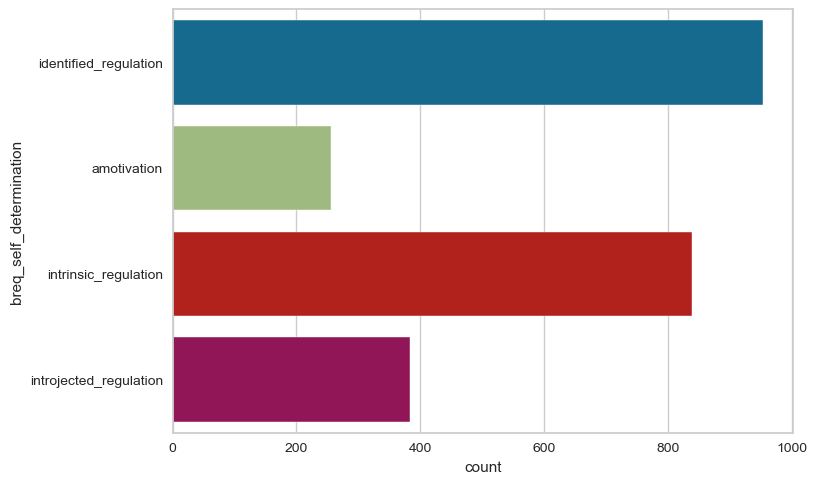

In [15]:
sns.countplot(y="breq_self_determination", data=train_data)

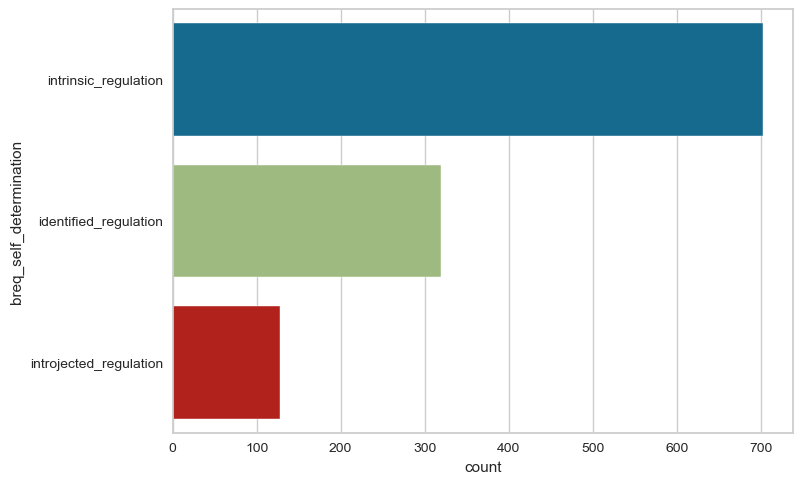

In [16]:
sns.countplot(y="breq_self_determination", data=test_data)

In [17]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [18]:
target_train = train_data['breq_self_determination']
train_data.drop(columns=['breq_self_determination'], inplace=True)
target_test = test_data['breq_self_determination']
test_data.drop(columns=['breq_self_determination'], inplace=True)
saved_cols = train_data.columns

In [19]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['breq_self_determination'] = target_train
test_data['breq_self_determination'] = target_test

In [20]:
s = setup(data=train_data, target='breq_self_determination', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,breq_self_determination
2,Target Type,Multiclass
3,Label Encoded,"amotivation: 0, identified_regulation: 1, intrinsic_regulation: 2, introjected_regulation: 3"
4,Original Data,"(2433, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [21]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.2985,0.0000,0.2109,0.3299,0.2925,-0.0361,-0.0362,0.0633
dt,Decision Tree Classifier,0.2815,0.3123,0.2063,0.3696,0.3061,-0.0229,-0.0261,0.0600
ada,Ada Boost Classifier,0.2562,0.3021,0.2112,0.3805,0.2691,-0.0559,-0.0604,0.2033
ridge,Ridge Classifier,0.2425,0.0000,0.2130,0.2894,0.2481,-0.0530,-0.0591,0.0333
lr,Logistic Regression,0.2380,0.3203,0.2018,0.3321,0.2587,-0.0724,-0.0773,0.3500
lda,Linear Discriminant Analysis,0.2302,0.3196,0.1992,0.2989,0.2456,-0.0794,-0.0857,0.0433
gbc,Gradient Boosting Classifier,0.2081,0.2747,0.1784,0.3186,0.2229,-0.0902,-0.1024,2.5000
lightgbm,Light Gradient Boosting Machine,0.2055,0.2849,0.1520,0.3177,0.2250,-0.1212,-0.1357,0.7600
et,Extra Trees Classifier,0.2035,0.2919,0.2285,0.3333,0.2206,-0.0739,-0.0919,0.1833
rf,Random Forest Classifier,0.2029,0.2934,0.2303,0.3388,0.2164,-0.0702,-0.0882,0.2500


In [22]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

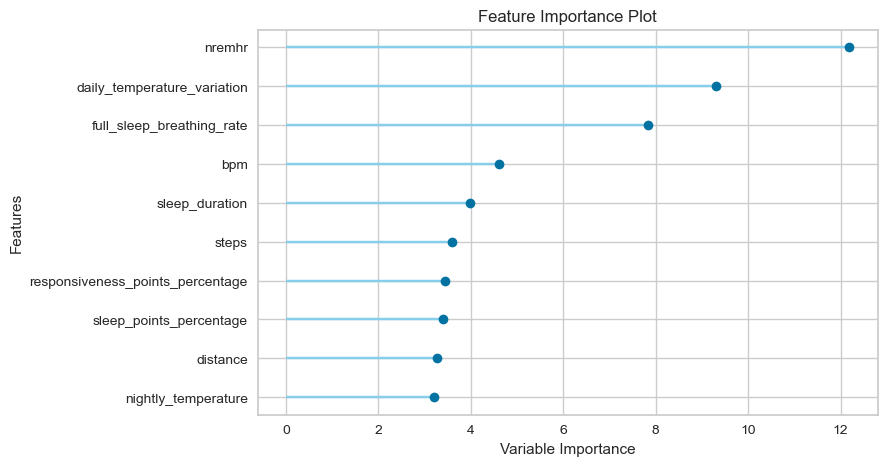

In [23]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [24]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,day_sin,month_cos,weekday_cos,week_cos,day_cos,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,621e2e8e67b776a24055b564,34.137687,57.4320,33.852,14.8,78.0,0.833333,0.675,0.866667,-1.788325,...,-0.988468,0.5,1.000000,0.951057,0.151428,LOW,LOW,HIGH,HIGH,AVERAGE
1,621e2e8e67b776a24055b564,33.794544,57.6810,33.852,15.8,80.0,0.833333,0.725,0.866667,-2.462709,...,-0.937752,0.5,0.623490,0.951057,0.347305,LOW,LOW,HIGH,HIGH,AVERAGE
2,621e2e8e67b776a24055b564,34.611011,57.4810,33.852,14.6,84.0,0.966667,0.725,0.866667,-2.385801,...,-0.848644,0.5,-0.222521,0.951057,0.528964,LOW,LOW,HIGH,HIGH,AVERAGE
3,621e2e8e67b776a24055b564,34.408304,57.4930,33.852,14.8,82.0,0.933333,0.725,0.833333,-2.124199,...,-0.724793,0.5,-0.900969,0.951057,0.688967,LOW,LOW,HIGH,HIGH,AVERAGE
4,621e2e8e67b776a24055b564,34.178922,56.7500,33.852,15.2,81.0,0.866667,0.725,0.866667,-2.396873,...,-0.571268,0.5,-0.900969,0.951057,0.820763,LOW,LOW,HIGH,HIGH,AVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,621e339967b776a240e502de,33.816660,51.7600,47.281,11.6,79.0,0.700000,0.725,0.966667,-1.793898,...,0.485302,0.5,-0.900969,0.809017,-0.874347,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3451,621e339967b776a240e502de,34.460723,51.3510,45.883,12.0,79.0,0.766667,0.775,0.833333,-0.705708,...,0.299363,0.5,-0.900969,0.809017,-0.954139,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3452,621e339967b776a240e502de,34.137341,50.5040,49.779,12.0,78.0,0.833333,0.700,0.833333,-1.229213,...,0.101168,0.5,-0.222521,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE
3453,621e339967b776a240e502de,34.406884,51.5330,45.322,11.6,73.0,0.700000,0.725,0.766667,-1.643875,...,-0.101168,0.5,0.623490,0.809017,-0.994869,AVERAGE,HIGH,AVERAGE,HIGH,AVERAGE


predict extraversion

In [25]:
data = data.drop(columns=['age', 'gender', 'bmi', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

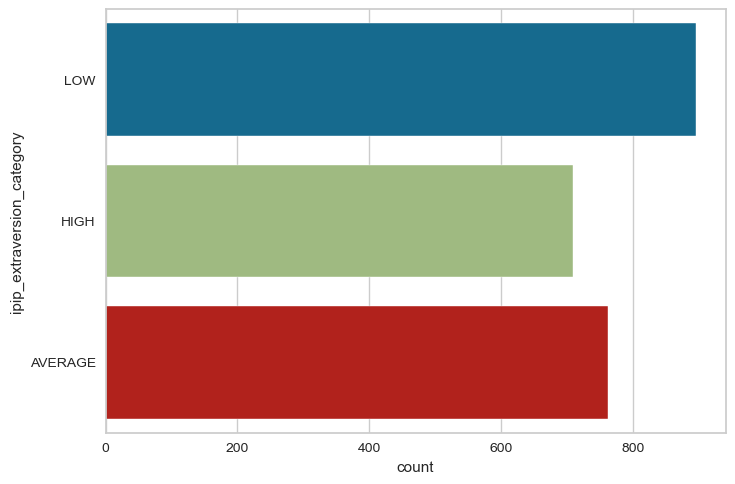

In [26]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

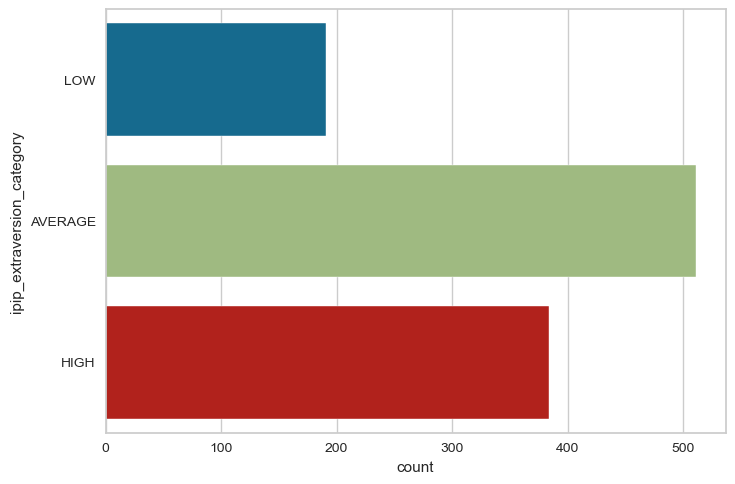

In [27]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [28]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [29]:
target_train = train_data['ipip_extraversion_category']
train_data.drop(columns=['ipip_extraversion_category'], inplace=True)
target_test = test_data['ipip_extraversion_category']
test_data.drop(columns=['ipip_extraversion_category'], inplace=True)
saved_cols = train_data.columns

In [30]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['ipip_extraversion_category'] = target_train
test_data['ipip_extraversion_category'] = target_test

In [37]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=2,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,ipip_extraversion_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [38]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3317,0.4373,0.3083,0.3253,0.3211,-0.0409,-0.0443,1.4800
qda,Quadratic Discriminant Analysis,0.3073,0.4480,0.2857,0.2834,0.2834,-0.0696,-0.0733,0.0850
dt,Decision Tree Classifier,0.2590,0.4666,0.2513,0.2943,0.2650,-0.0666,-0.0816,1.5200
dummy,Dummy Classifier,0.2587,0.5000,0.3333,0.0725,0.1120,0.0000,0.0000,0.0600
svm,SVM - Linear Kernel,0.2581,0.0000,0.2419,0.2591,0.2542,-0.1266,-0.1296,0.0750
ada,Ada Boost Classifier,0.2533,0.3875,0.2425,0.2637,0.2523,-0.1102,-0.1147,0.2000
knn,K Neighbors Classifier,0.2491,0.4343,0.2671,0.2679,0.2355,-0.1020,-0.1068,1.6050
lda,Linear Discriminant Analysis,0.2417,0.4071,0.2547,0.2606,0.2372,-0.1072,-0.1149,0.0700
ridge,Ridge Classifier,0.2313,0.0000,0.2430,0.2578,0.2311,-0.1236,-0.1302,0.0600
lr,Logistic Regression,0.2163,0.3956,0.2270,0.2469,0.2162,-0.1359,-0.1476,3.1200


In [39]:
best

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
plot_model(best, plot='feature')

predict agreeableness

In [2]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [3]:
data = data.drop(columns=['age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

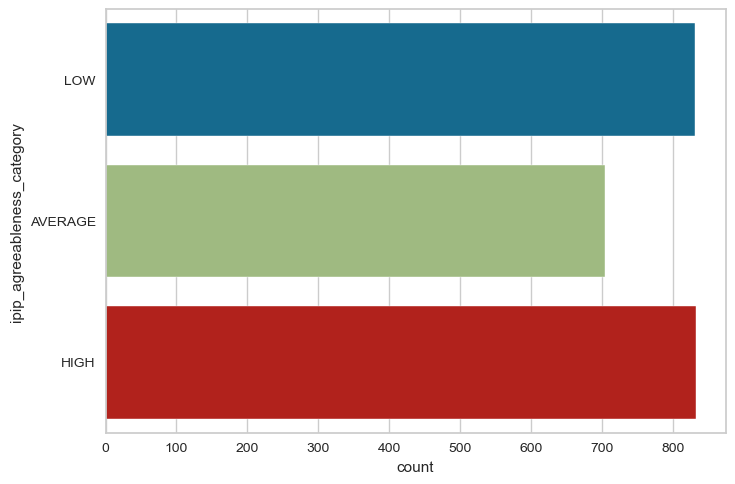

In [4]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

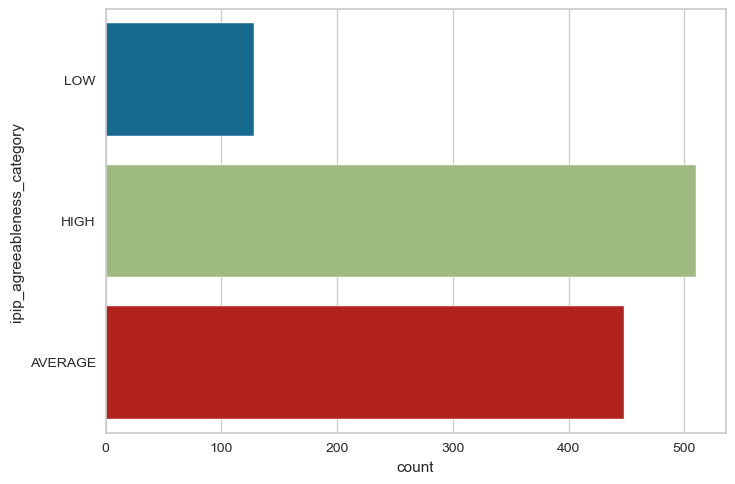

In [5]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [6]:
target_train = train_data['ipip_agreeableness_category']
train_data.drop(columns=['ipip_agreeableness_category'], inplace=True)
target_test = test_data['ipip_agreeableness_category']
test_data.drop(columns=['ipip_agreeableness_category'], inplace=True)
saved_cols = train_data.columns

In [ ]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['ipip_agreeableness_category'] = target_train
test_data['ipip_agreeableness_category'] = target_test

In [ ]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

In [ ]:
best = compare_models(errors="raise")

In [ ]:
best

In [ ]:
plot_model(best, plot='feature')

predict conscientiousness

In [8]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [9]:
data = data.drop(columns=['age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

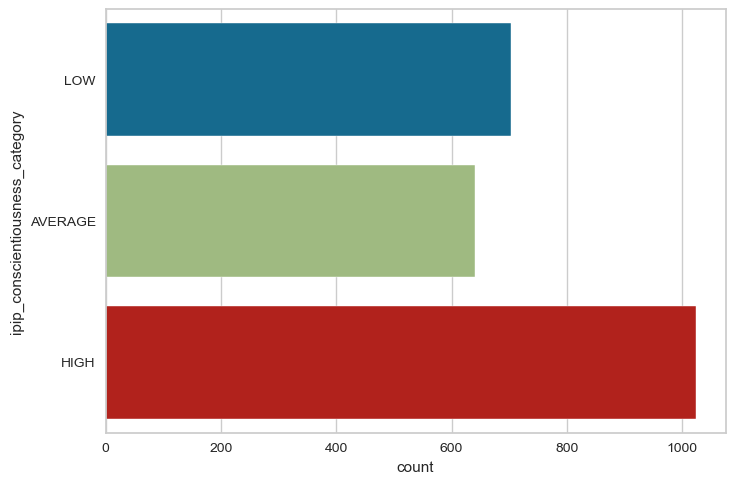

In [10]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

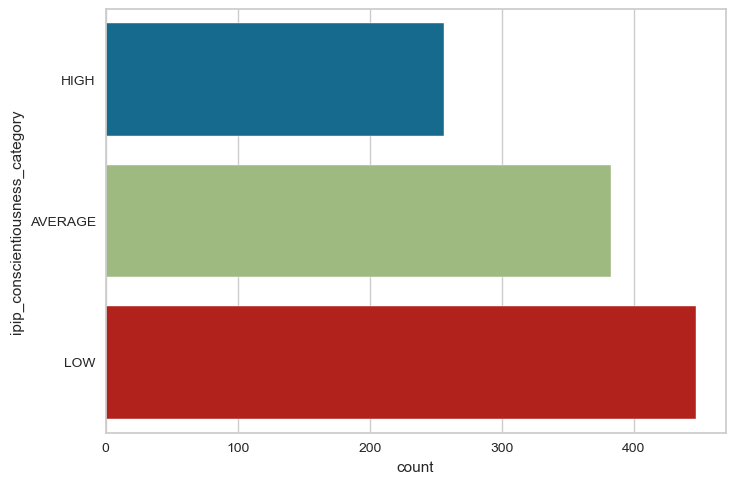

In [11]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [12]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [13]:
target_train = train_data['ipip_conscientiousness_category']
train_data.drop(columns=['ipip_conscientiousness_category'], inplace=True)
target_test = test_data['ipip_conscientiousness_category']
test_data.drop(columns=['ipip_conscientiousness_category'], inplace=True)
saved_cols = train_data.columns

In [14]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['ipip_conscientiousness_category'] = target_train
test_data['ipip_conscientiousness_category'] = target_test

In [15]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,ipip_conscientiousness_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3619,0.4319,0.2885,0.3407,0.3185,-0.0820,-0.0944,0.0700
nb,Naive Bayes,0.3401,0.4061,0.2638,0.2924,0.2871,-0.1106,-0.1181,1.0933
knn,K Neighbors Classifier,0.2788,0.4395,0.2810,0.3186,0.2787,-0.0556,-0.0605,1.2000
svm,SVM - Linear Kernel,0.2677,0.0000,0.2619,0.2411,0.2482,-0.1535,-0.1595,0.0700
gbc,Gradient Boosting Classifier,0.2613,0.4066,0.2622,0.3005,0.2534,-0.1113,-0.1238,1.4100
dt,Decision Tree Classifier,0.2606,0.4386,0.2572,0.3193,0.2692,-0.1073,-0.1150,0.0667
ada,Ada Boost Classifier,0.2573,0.3654,0.2698,0.2549,0.2429,-0.1032,-0.1162,0.2033
lightgbm,Light Gradient Boosting Machine,0.2326,0.3932,0.2618,0.3002,0.2301,-0.1172,-0.1335,0.7733
lda,Linear Discriminant Analysis,0.2252,0.3514,0.2420,0.2405,0.2233,-0.1489,-0.1582,0.0700
et,Extra Trees Classifier,0.2242,0.3242,0.1967,0.2216,0.2112,-0.2212,-0.2424,0.2300


In [17]:
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
plot_model(best, plot='feature')

predict stability

In [19]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [20]:
data = data.drop(columns=['age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

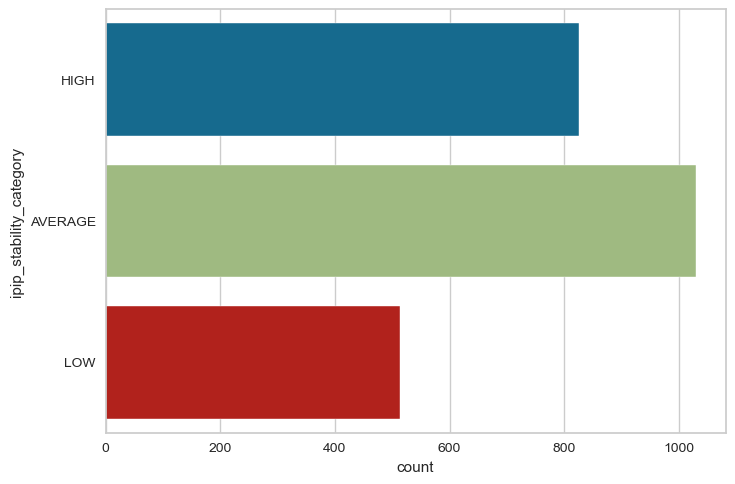

In [21]:
sns.countplot(y="ipip_stability_category", data=train_data)

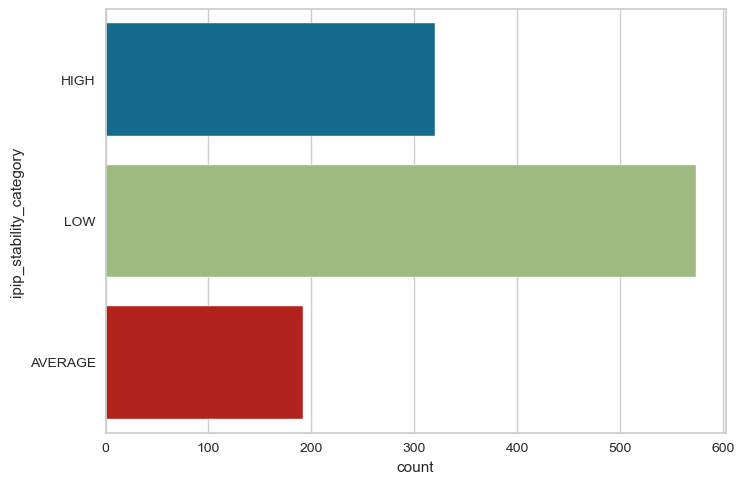

In [22]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [23]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [24]:
target_train = train_data['ipip_stability_category']
train_data.drop(columns=['ipip_stability_category'], inplace=True)
target_test = test_data['ipip_stability_category']
test_data.drop(columns=['ipip_stability_category'], inplace=True)
saved_cols = train_data.columns

In [25]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['ipip_stability_category'] = target_train
test_data['ipip_stability_category'] = target_test

In [26]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [27]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4085,0.5973,0.3888,0.5013,0.4279,0.1058,0.1163,0.2000
qda,Quadratic Discriminant Analysis,0.4008,0.5540,0.4254,0.4519,0.3995,0.0861,0.0936,0.0733
et,Extra Trees Classifier,0.3769,0.5614,0.4085,0.4092,0.3490,0.0843,0.0986,0.3100
gbc,Gradient Boosting Classifier,0.3729,0.5776,0.3978,0.4452,0.3676,0.0800,0.0917,2.0533
lightgbm,Light Gradient Boosting Machine,0.3614,0.5744,0.3866,0.3787,0.3367,0.0568,0.0649,0.9100
ada,Ada Boost Classifier,0.3595,0.6635,0.4244,0.4928,0.3548,0.0990,0.1233,0.4100
dummy,Dummy Classifier,0.3506,0.5000,0.3333,0.1284,0.1866,0.0000,0.0000,0.0667
nb,Naive Bayes,0.3503,0.4694,0.3151,0.3631,0.3312,-0.0324,-0.0510,0.0700
dt,Decision Tree Classifier,0.3376,0.4997,0.3476,0.4075,0.3275,0.0148,0.0120,0.0600
svm,SVM - Linear Kernel,0.3340,0.0000,0.3499,0.4260,0.3389,0.0161,0.0259,0.0967


In [28]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [30]:
data = pd.read_pickle('data/fitbit_personality_processed.pkl')

In [31]:
data = data.drop(columns=['age', 'gender', 'bmi', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

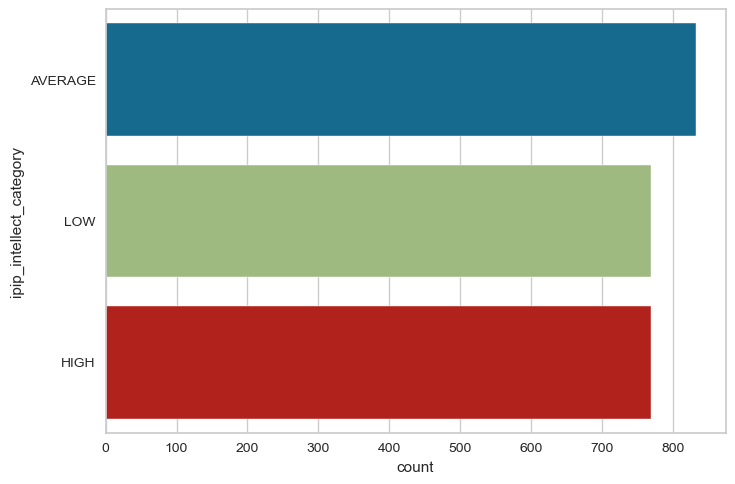

In [32]:
sns.countplot(y="ipip_intellect_category", data=train_data)

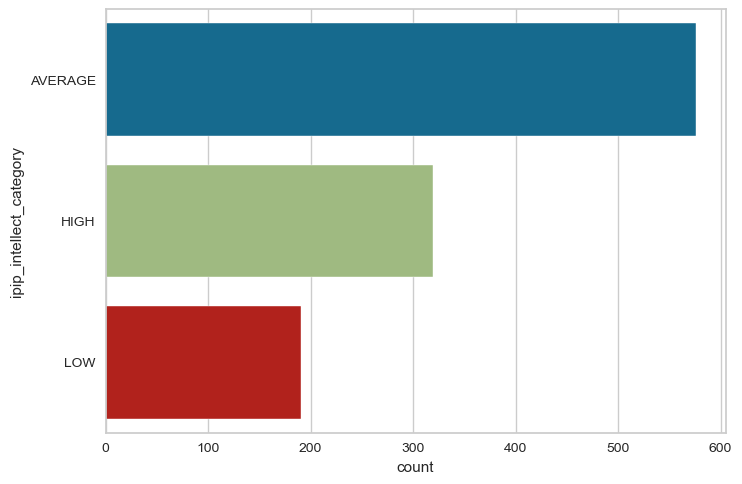

In [33]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [34]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [36]:
target_train = train_data['ipip_intellect_category']
train_data.drop(columns=['ipip_intellect_category'], inplace=True)
target_test = test_data['ipip_intellect_category']
test_data.drop(columns=['ipip_intellect_category'], inplace=True)
saved_cols = train_data.columns

In [37]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['ipip_intellect_category'] = target_train
test_data['ipip_intellect_category'] = target_test

In [38]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,ipip_intellect_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(2369, 61)"
5,Missing Values,True
6,Numeric Features,59
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [39]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.4020,0.5790,0.3561,0.5273,0.4340,0.0742,0.0733,0.2367
nb,Naive Bayes,0.3870,0.4860,0.2863,0.4969,0.3869,0.0004,0.0082,0.0600
ridge,Ridge Classifier,0.3709,0.0000,0.3205,0.5108,0.4103,0.0434,0.0462,0.0533
lda,Linear Discriminant Analysis,0.3589,0.5731,0.3101,0.5176,0.4002,0.0435,0.0449,0.0467
lr,Logistic Regression,0.3229,0.5503,0.2938,0.4842,0.3568,0.0182,0.0146,0.4000
svm,SVM - Linear Kernel,0.3209,0.0000,0.2771,0.5065,0.3696,0.0127,0.0134,0.0700
lightgbm,Light Gradient Boosting Machine,0.3100,0.5471,0.2682,0.4996,0.3525,-0.0028,-0.0034,0.6833
dummy,Dummy Classifier,0.3031,0.5000,0.3333,0.1155,0.1624,0.0000,0.0000,0.0333
qda,Quadratic Discriminant Analysis,0.3014,0.4750,0.3679,0.4648,0.3056,-0.0124,-0.0113,0.0533
ada,Ada Boost Classifier,0.2864,0.5859,0.3291,0.5192,0.3045,0.0363,0.0408,0.2500


In [40]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
plot_model(best, plot='feature')

Stai stress category prediction

In [42]:
data = pd.read_pickle('data/fitbit_stai_processed.pkl')
data

,id,stai_stress,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,...,Yoga/Pilates,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,stai_stress_category
0,621e2e8e67b776a24055b564,45.0,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,...,0.0,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,Below average
1,621e2e8e67b776a24055b564,46.0,34.476865,56.570,109.509,14.4,83.0,0.833333,0.775,0.800000,...,0.0,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,Average
2,621e2e8e67b776a24055b564,46.0,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,...,0.0,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,Average
3,621e2e8e67b776a24055b564,46.0,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,...,0.0,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,Average
4,621e2e8e67b776a24055b564,54.0,34.418045,53.006,107.388,15.6,76.0,0.766667,0.700,0.766667,...,0.0,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,Above average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,621e339967b776a240e502de,49.0,34.050838,61.043,34.792,14.4,77.0,0.766667,0.750,0.766667,...,0.0,7.071068e-01,0.000000,7.557496e-01,-0.994522,-7.071068e-01,1.000000,0.654861,-0.104528,Average
275,621e339967b776a240e502de,51.0,34.674633,51.192,49.232,12.2,83.0,0.733333,0.925,0.800000,...,0.0,3.673940e-16,0.000000,9.898214e-01,0.951057,-1.000000e+00,1.000000,0.142315,0.309017,Above average
276,621e339967b776a240e502de,45.0,34.303759,46.311,56.468,11.0,87.0,0.833333,0.900,0.900000,...,0.0,3.673940e-16,0.781831,9.898214e-01,0.207912,-1.000000e+00,0.623490,-0.142315,-0.978148,Below average
277,621e339967b776a240e502de,48.0,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,...,0.0,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,Average


In [43]:
data = data.drop(columns=['stai_stress', 'age', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

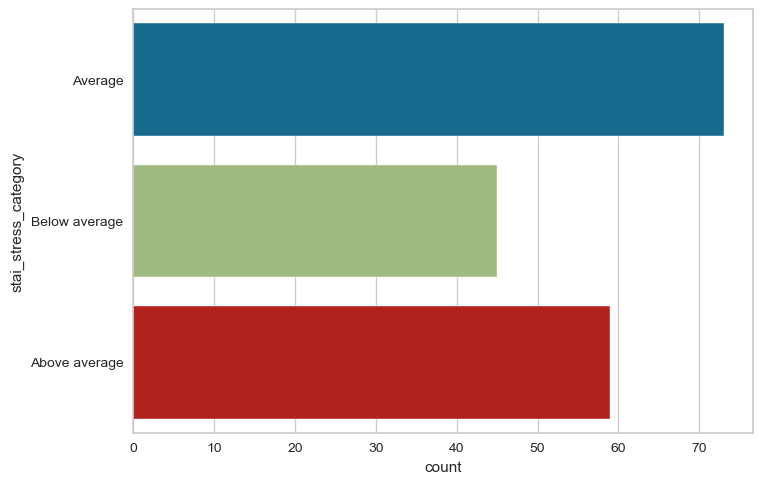

In [44]:
sns.countplot(y="stai_stress_category", data=train_data)

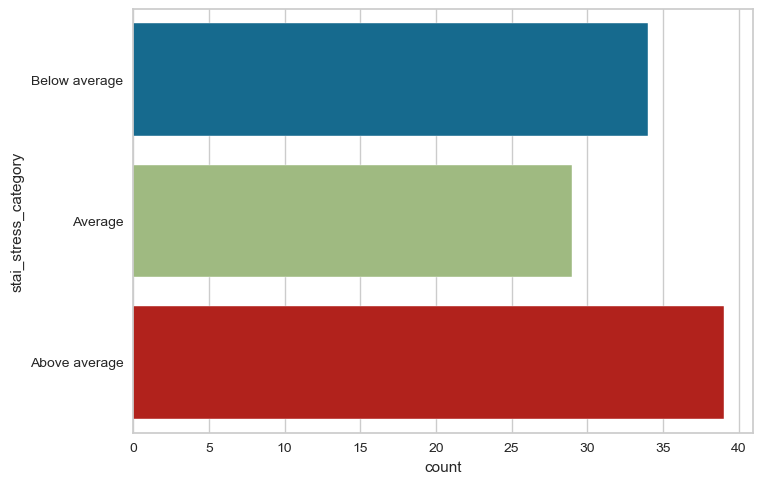

In [45]:
sns.countplot(y="stai_stress_category", data=test_data)

In [46]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [47]:
target_train = train_data['stai_stress_category']
train_data.drop(columns=['stai_stress_category'], inplace=True)
target_test = test_data['stai_stress_category']
test_data.drop(columns=['stai_stress_category'], inplace=True)
saved_cols = train_data.columns

In [48]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['stai_stress_category'] = target_train
test_data['stai_stress_category'] = target_test

In [49]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data, fix_imbalance=True)

,Description,Value
0,session_id,123
1,Target,stai_stress_category
2,Target Type,Multiclass
3,Label Encoded,"Above average: 0, Average: 1, Below average: 2"
4,Original Data,"(177, 61)"
5,Missing Values,True
6,Numeric Features,51
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [50]:
best = compare_models(errors="raise")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4314,0.5000,0.3333,0.1892,0.2622,0.0000,0.0000,0.0400
lr,Logistic Regression,0.3824,0.5521,0.3858,0.3874,0.3650,0.0764,0.0865,0.1000
lightgbm,Light Gradient Boosting Machine,0.3627,0.4926,0.3507,0.3588,0.3512,0.0412,0.0400,0.3867
lda,Linear Discriminant Analysis,0.3529,0.4979,0.3647,0.3898,0.3431,0.0343,0.0404,0.0367
gbc,Gradient Boosting Classifier,0.3431,0.5188,0.3484,0.3704,0.3391,0.0235,0.0240,0.4433
et,Extra Trees Classifier,0.3431,0.5363,0.3456,0.3855,0.3407,0.0291,0.0316,0.2933
svm,SVM - Linear Kernel,0.3333,0.0000,0.3389,0.2870,0.2638,0.0281,0.0228,0.0233
rf,Random Forest Classifier,0.3333,0.4811,0.3328,0.3646,0.3374,0.0086,0.0085,0.3533
ada,Ada Boost Classifier,0.3333,0.4974,0.3315,0.3070,0.3072,-0.0138,-0.0148,0.1500
ridge,Ridge Classifier,0.3235,0.0000,0.3331,0.3477,0.3061,-0.0005,0.0069,0.0367


In [51]:
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
plot_model(best, plot='feature')

Panas negative affect prediction

In [53]:
from pycaret.regression import *

In [54]:
data = pd.read_pickle('data/fitbit_panas_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,positive_affect_score,negative_affect_score
0,621e2e8e67b776a24055b564,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,-1.972848,...,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,37,14
1,621e2e8e67b776a24055b564,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,-2.385801,...,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,38,12
2,621e2e8e67b776a24055b564,34.476865,56.570,109.509,14.4,83.0,0.833333,0.775,0.800000,-1.912061,...,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,37,12
3,621e2e8e67b776a24055b564,34.418045,53.006,107.388,15.6,76.0,0.766667,0.700,0.766667,-2.170245,...,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,31,12
4,621e2e8e67b776a24055b564,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,-2.154991,...,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,37,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,-1.986618,...,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,44,13
264,621e339967b776a240e502de,35.107574,54.325,47.929,12.2,87.0,0.866667,0.950,0.766667,-1.998401,...,3.673940e-16,0.000000,7.557496e-01,-0.587785,-1.000000e+00,1.000000,-0.654861,0.809017,45,11
265,621e339967b776a240e502de,34.957428,52.810,47.801,12.4,81.0,0.700000,0.900,0.866667,-2.028679,...,7.071068e-01,0.000000,2.817326e-01,0.587785,7.071068e-01,1.000000,0.959493,0.809017,44,11
266,621e339967b776a240e502de,34.073346,51.364,51.324,12.2,84.0,0.833333,0.875,0.866667,-2.023243,...,7.071068e-01,0.974928,5.406408e-01,0.587785,7.071068e-01,-0.222521,0.841254,-0.809017,45,13


In [55]:
data = data.drop(columns=['positive_affect_score', 'age', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [56]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [58]:
target_train = train_data['negative_affect_score']
train_data.drop(columns=['negative_affect_score'], inplace=True)
target_test = test_data['negative_affect_score']
test_data.drop(columns=['negative_affect_score'], inplace=True)
saved_cols = train_data.columns

In [59]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['negative_affect_score'] = target_train
test_data['negative_affect_score'] = target_test

In [60]:
s = setup(data=train_data, target='negative_affect_score', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,negative_affect_score
2,Original Data,"(166, 61)"
3,Missing Values,True
4,Numeric Features,51
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(91, 60)"


In [61]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,7.6531,83.4527,8.8574,-0.3148,0.3931,0.3955,0.0133
llar,Lasso Least Angle Regression,7.6531,83.4527,8.8574,-0.3148,0.3931,0.3955,0.0133
dummy,Dummy Regressor,7.6531,83.4527,8.8574,-0.3148,0.3931,0.3955,0.0133
en,Elastic Net,7.6708,83.5768,8.8647,-0.3185,0.3931,0.3959,0.0133
br,Bayesian Ridge,8.0740,94.0511,9.5338,-0.5751,0.4146,0.4131,0.0433
par,Passive Aggressive Regressor,7.9593,93.0096,9.6056,-0.6714,0.4491,0.4141,0.0167
rf,Random Forest Regressor,8.4801,103.6214,10.0093,-0.7166,0.4408,0.4391,0.1767
et,Extra Trees Regressor,8.4534,106.1134,10.1488,-0.7784,0.4436,0.4328,0.1400
ridge,Ridge Regression,8.6398,107.3861,10.2533,-0.8475,0.4425,0.4387,0.0167
lightgbm,Light Gradient Boosting Machine,8.6309,113.8074,10.4818,-0.8757,0.4615,0.4555,0.0200


In [62]:
best

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)

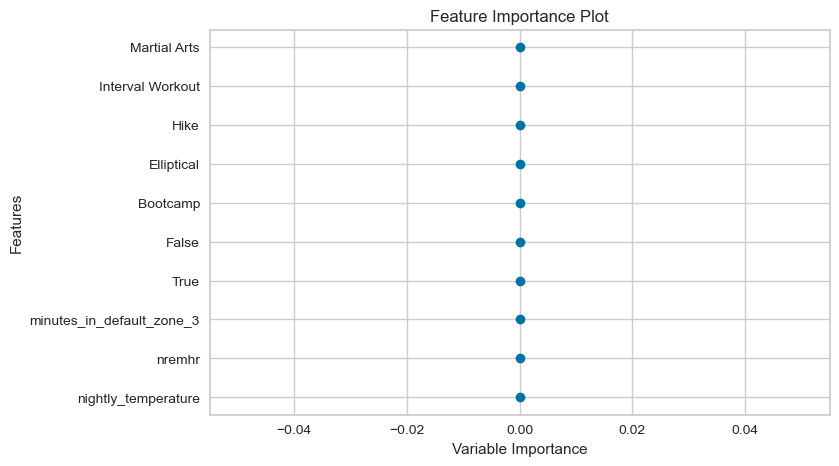

In [63]:
plot_model(best, plot='feature')

Panas positive affect prediction

In [64]:
data = pd.read_pickle('data/fitbit_panas_processed.pkl')
data

,id,nightly_temperature,nremhr,rmssd,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,positive_affect_score,negative_affect_score
0,621e2e8e67b776a24055b564,34.515655,59.798,98.515,15.4,74.0,0.766667,0.725,0.700000,-1.972848,...,-7.071068e-01,0.000000,7.557496e-01,-0.743145,7.071068e-01,1.000000,-0.654861,0.669131,37,14
1,621e2e8e67b776a24055b564,34.408304,57.481,94.303,14.8,81.0,0.866667,0.725,0.866667,-2.385801,...,-7.071068e-01,0.000000,-1.133108e-15,0.207912,-7.071068e-01,1.000000,1.000000,0.978148,38,12
2,621e2e8e67b776a24055b564,34.476865,56.570,109.509,14.4,83.0,0.833333,0.775,0.800000,-1.912061,...,-1.000000e+00,0.000000,2.817326e-01,0.994522,-1.836970e-16,1.000000,0.959493,0.104528,37,12
3,621e2e8e67b776a24055b564,34.418045,53.006,107.388,15.6,76.0,0.766667,0.700,0.766667,-2.170245,...,-1.000000e+00,0.000000,9.096320e-01,-0.406737,-1.836970e-16,1.000000,0.415415,0.913545,31,12
4,621e2e8e67b776a24055b564,34.254286,57.330,100.374,15.0,75.0,0.833333,0.700,0.766667,-2.154991,...,-7.071068e-01,0.000000,9.096320e-01,-0.743145,7.071068e-01,1.000000,-0.415415,-0.669131,37,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,621e339967b776a240e502de,34.876472,50.683,47.293,11.6,82.0,0.766667,0.875,0.866667,-1.986618,...,3.673940e-16,0.000000,9.096320e-01,-0.866025,-1.000000e+00,1.000000,-0.415415,-0.500000,44,13
264,621e339967b776a240e502de,35.107574,54.325,47.929,12.2,87.0,0.866667,0.950,0.766667,-1.998401,...,3.673940e-16,0.000000,7.557496e-01,-0.587785,-1.000000e+00,1.000000,-0.654861,0.809017,45,11
265,621e339967b776a240e502de,34.957428,52.810,47.801,12.4,81.0,0.700000,0.900,0.866667,-2.028679,...,7.071068e-01,0.000000,2.817326e-01,0.587785,7.071068e-01,1.000000,0.959493,0.809017,44,11
266,621e339967b776a240e502de,34.073346,51.364,51.324,12.2,84.0,0.833333,0.875,0.866667,-2.023243,...,7.071068e-01,0.974928,5.406408e-01,0.587785,7.071068e-01,-0.222521,0.841254,-0.809017,45,13


In [65]:
data = data.drop(columns=['negative_affect_score', 'age', 'gender', 'bmi'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

In [66]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [67]:
target_train = train_data['positive_affect_score']
train_data.drop(columns=['positive_affect_score'], inplace=True)
target_test = test_data['positive_affect_score']
test_data.drop(columns=['positive_affect_score'], inplace=True)
saved_cols = train_data.columns

In [68]:
train_data, test_data = preprocessing_functions.normalization(train_data, test_data)
train_data.columns = saved_cols
test_data.columns = saved_cols
train_data['positive_affect_score'] = target_train
test_data['positive_affect_score'] = target_test

In [69]:
s = setup(data=train_data, target='positive_affect_score', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,positive_affect_score
2,Original Data,"(166, 61)"
3,Missing Values,True
4,Numeric Features,51
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(91, 60)"


In [70]:
best = compare_models(errors="raise")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,5.9841,57.7717,7.5836,-0.4622,0.2588,0.2224,0.0200
llar,Lasso Least Angle Regression,5.9841,57.7717,7.5836,-0.4622,0.2588,0.2224,0.0233
dummy,Dummy Regressor,5.9841,57.7717,7.5836,-0.4622,0.2588,0.2224,0.0233
en,Elastic Net,5.9873,57.8152,7.5865,-0.4631,0.2589,0.2225,0.0200
br,Bayesian Ridge,6.0437,59.5404,7.6950,-0.5073,0.2626,0.2252,0.0333
lightgbm,Light Gradient Boosting Machine,6.1780,60.3141,7.7265,-0.5159,0.2613,0.2266,0.0300
knn,K Neighbors Regressor,6.3244,67.7228,8.2133,-0.7112,0.2790,0.2364,0.0233
ada,AdaBoost Regressor,6.3419,67.4650,8.1949,-0.7117,0.2760,0.2290,0.0800
et,Extra Trees Regressor,6.4891,69.6540,8.3263,-0.7663,0.2829,0.2405,0.1833
rf,Random Forest Regressor,6.6823,70.2173,8.3377,-0.7982,0.2814,0.2412,0.2167


In [71]:
best

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False)